In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [4]:
! git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (4/4), done.
Unpacking objects:  66% (4/6), 228.00 KiB | 391.00 KiB/sUnpacking objects:  83% (5/6), 228.00 KiB | 391.00 KiB/sremote: Total 6 (delta 2), reused 6 (delta 2), pack-reused 0
Unpacking objects: 100% (6/6), 1.18 MiB | 1.17 MiB/s, done.
From https://github.com/jaentrouble/Adipose_tf_train
   ba856e3..b25648b  master     -> origin/master
Updating ba856e3..b25648b
Fast-forward
 check_trained.ipynb                     |  76 +++++++++++++++++++++-----------
 result_images/full_conv_5_1_val_010.png | Bin 0 -> 412761 bytes
 result_images/full_conv_5_2_val_030.png | Bin 0 -> 423184 bytes
 3 files changed, 51 insertions(+), 25 deletions(-)
 create mode 100644 result_images/full_conv_5_1_val_010.png
 create mode 100644 result_images/full_conv_5_2_val_030.png


In [10]:
! python train_adipose.py -mf --name full_conv4_2 --epochs 10 --steps 100 --model full_conv4_2 -lr lr_mul_inv

2020-08-13 18:03:17.598305: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-13 18:03:18.733809: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-13 18:03:18.750757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-13 18:03:18.751174: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.77GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2020-08-13 18:03:18.751193: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-13 18:03:18.752449: I tensorflow/stream_executor/pla

In [11]:
import tensorflow as tf
import tensorflow.keras as keras
from model_tools import load_dataset, load_valset
import time

In [12]:
tf.keras.backend.clear_session()

In [13]:

import matplotlib.pyplot as plt

In [14]:
Model_Name = 'full_conv4_2'

In [15]:
trained_model = keras.models.load_model('saved_model/'+Model_Name)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: GeForce RTX 2070 SUPER, compute capability 7.5


In [16]:
val_ds = load_valset('val_image',10)
test_ds = load_dataset('test_image',10)

In [17]:
img_batch, mask_batch = list(val_ds.take(1).as_numpy_iterator())[0]
print(img_batch.shape)
print(mask_batch.shape)

(32, 200, 200, 3)
(32, 100, 100)


In [18]:
st = time.time()
predict_batch = trained_model(img_batch)
print('took:{}'.format(time.time()-st))

took:1.2405357360839844


In [19]:
print(predict_batch.shape)

(32, 100, 100)


In [20]:
import numpy as np

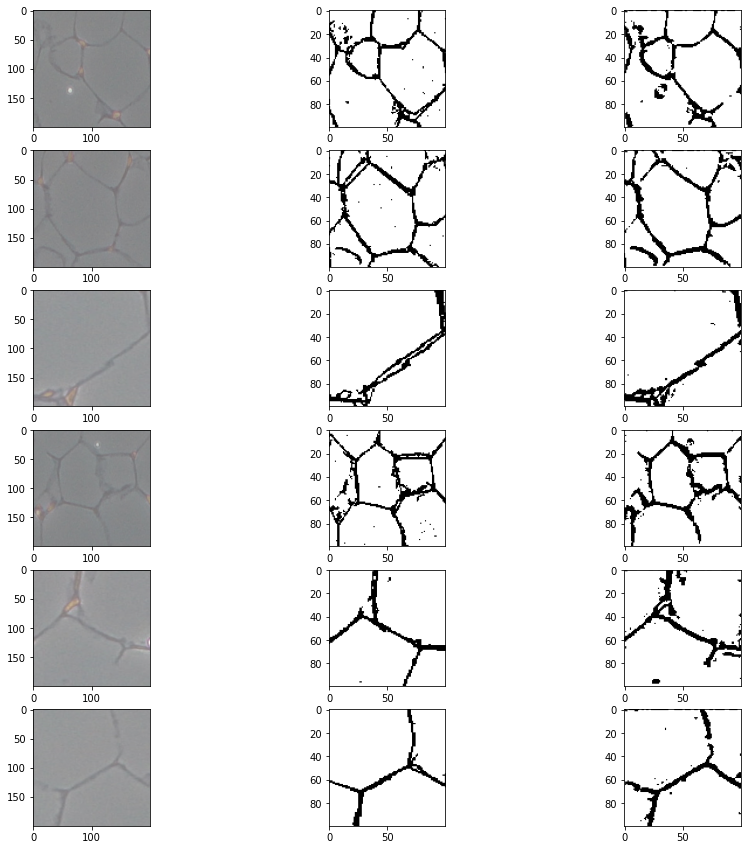

In [21]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
for img, mask, pred in zip(img_batch[:n],mask_batch[:n],predict_batch[:n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred>0.3, cmap='binary')
    i += 3
plt.show()

In [22]:
print(predict_batch[0][0])
print(np.min(predict_batch[0]))
print(np.max(predict_batch[0]))

tf.Tensor(
[0.3331777  0.49832153 0.20641373 0.2592626  0.45931864 0.45771235
 0.38133475 0.3100673  0.28160313 0.28616926 0.3032157  0.33785862
 0.3426815  0.33220208 0.37639388 0.50851357 0.6000126  0.57349926
 0.46605572 0.3589146  0.25571522 0.20040116 0.22541659 0.33220208
 0.38283345 0.3710227  0.3469837  0.33328617 0.2782568  0.23423146
 0.22456521 0.25870037 0.31195065 0.34775856 0.4356014  0.64467263
 0.6897238  0.48706344 0.20657375 0.14535783 0.17497347 0.2193375
 0.27279878 0.36409897 0.43146437 0.42620215 0.42351764 0.44688696
 0.43722266 0.34687307 0.27884555 0.2863688  0.3208213  0.31090358
 0.2798285  0.26265267 0.255158   0.25146383 0.2786492  0.34687307
 0.3901854  0.3784591  0.3901854  0.45232424 0.44906038 0.3451053
 0.26702574 0.29178745 0.34643072 0.30197924 0.20291664 0.15974101
 0.18639107 0.25795195 0.3306873  0.34400254 0.40981114 0.6270382
 0.76082844 0.58207536 0.25534365 0.13706978 0.21354114 0.3454364
 0.39117336 0.3176379  0.2555294  0.26284182 0.35042137

In [23]:
print(img_batch[0][0])
print(np.min(img_batch[0]))
print(np.max(img_batch[0]))

[[0.5294118  0.53333336 0.5411765 ]
 [0.5294118  0.5372549  0.54509807]
 [0.5294118  0.5372549  0.54509807]
 [0.53333336 0.5372549  0.54509807]
 [0.53333336 0.5411765  0.54509807]
 [0.5254902  0.5411765  0.54509807]
 [0.5294118  0.5411765  0.54509807]
 [0.53333336 0.54901963 0.5529412 ]
 [0.5254902  0.5411765  0.5372549 ]
 [0.5294118  0.54509807 0.54509807]
 [0.52156866 0.5372549  0.53333336]
 [0.5254902  0.5411765  0.5372549 ]
 [0.53333336 0.54901963 0.54509807]
 [0.52156866 0.5372549  0.5372549 ]
 [0.5254902  0.5411765  0.5411765 ]
 [0.5372549  0.54901963 0.5529412 ]
 [0.53333336 0.54901963 0.5529412 ]
 [0.53333336 0.5372549  0.54509807]
 [0.53333336 0.5411765  0.54509807]
 [0.5254902  0.53333336 0.5372549 ]
 [0.5372549  0.5411765  0.54901963]
 [0.53333336 0.5411765  0.54509807]
 [0.53333336 0.54509807 0.5411765 ]
 [0.53333336 0.5411765  0.5372549 ]
 [0.53333336 0.5411765  0.5372549 ]
 [0.53333336 0.5411765  0.5372549 ]
 [0.5254902  0.5411765  0.5372549 ]
 [0.53333336 0.54509807 0.54